This exercise was part of the Coursera course: Applied Plotting, Charting & Data Representation
in Python

## Research Question

How do the distributions of half-marathon times for the top 40 participants compare across 4 different half-marathons (Vancouver Chilly Chase, Shamrock'n Race, Vancouver Historic Half, Fall Classic) in Burnaby and Vancouver in 2018? (Side hypothesis: the participants of the half-marathon in January will take longer to finish because they have been training less over the winter months.)

## Links

These links have race results. looking at 2018 half marathons. All have at least 100 participants. All have "chip time"

Try Events Website: http://www.tryevents.ca/try_events_results.htm

Vancouver Chilly Chase 2018: http://www.tryevents.ca/images/results/vccresults2018.pdf

Shamrock'n Race 2018: http://www.tryevents.ca/images/results/2018canshamrockresults.pdf

Vancouver Historic Half 2018: http://www.tryevents.ca/images/results/vhhresults2018.pdf

UBC Fall Classic 2018: https://www.sportstats.ca/display-results.xhtml?raceid=95497

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#data for Green Shamrock'n Race 2018 in Burnaby 
shamrock_1 = pd.read_csv('shamrock_2018_results.csv', skiprows=9, nrows=80).dropna()
shamrock_1['Hour'] = shamrock_1['PClhaicpeTime '].str[0]
shamrock_1['Minute'] = shamrock_1['PClhaicpeTime '].str[2:4]
shamrock_1['Time'] = shamrock_1['Minute'].astype('int8') + shamrock_1['Hour'].astype('int8')*60
shamrock_1.reset_index(inplace=True)
shamrock = shamrock_1[['Place ','Time']]

shamrock

,Place,Time
0,1.0,84
1,2.0,87
2,3.0,87
3,4.0,89
4,5.0,90
5,6.0,90
6,7.0,90
7,8.0,92
8,9.0,94
9,10.0,95


In [4]:
#data fro Vancouver Historic Half Marathon 2018 in Vancouver
vanhist_1 = pd.read_csv('vancouver_historic_half_2018_results.csv', skiprows=9, nrows=80).dropna()
vanhist_1['Hour'] = vanhist_1['PClahcipe Time '].str[0]
vanhist_1['Minute'] = vanhist_1['PClahcipe Time '].str[2:4]
vanhist_1['Time'] = vanhist_1['Minute'].astype('int8') + vanhist_1['Hour'].astype('int8')*60
vanhist_1.reset_index(inplace=True)
vanhist = vanhist_1[['Place ','Time']]

vanhist.head()

,Place,Time
0,1.0,77
1,2.0,81
2,3.0,81
3,4.0,82
4,5.0,83


In [5]:
#data for Vancouver Chilly Chase 2018 in Vancouver

chillychase_1 = pd.read_csv('chilly_chase_2018_results.csv', skiprows=9, nrows=80).dropna()
chillychase_1['Hour'] = chillychase_1['Chip Time '].str[0]
chillychase_1['Minute'] = chillychase_1['Chip Time '].str[2:4]
chillychase_1['Time'] = chillychase_1['Minute'].astype('int8') + chillychase_1['Hour'].astype('int8')*60
chillychase_1.reset_index(inplace=True)
chillychase = chillychase_1[['Place ','Time']]

chillychase.head()

,Place,Time
0,1.0,86
1,2.0,87
2,3.0,88
3,4.0,88
4,5.0,89


In [6]:
#data for Fall Classic 2018 in Vancouver

ubc_1= pd.read_html("https://www.sportstats.ca/display-results.xhtml?raceid=95497")[0]
ubc_1['Hour'] = ubc_1['chip time'].str[1].astype('int8')
ubc_1['Minute'] = ubc_1['chip time'].str[3:5].astype('int8')
ubc_1['Time'] = ubc_1['Hour']*60 + ubc_1['Minute']
ubc_1.rename(columns={'Rank': 'Place'}, inplace=True)
ubc = ubc_1[['Place', 'Time']]

ubc.head()


,Place,Time
0,1,69
1,2,72
2,3,72
3,4,75
4,5,76


<IPython.core.display.Javascript object>


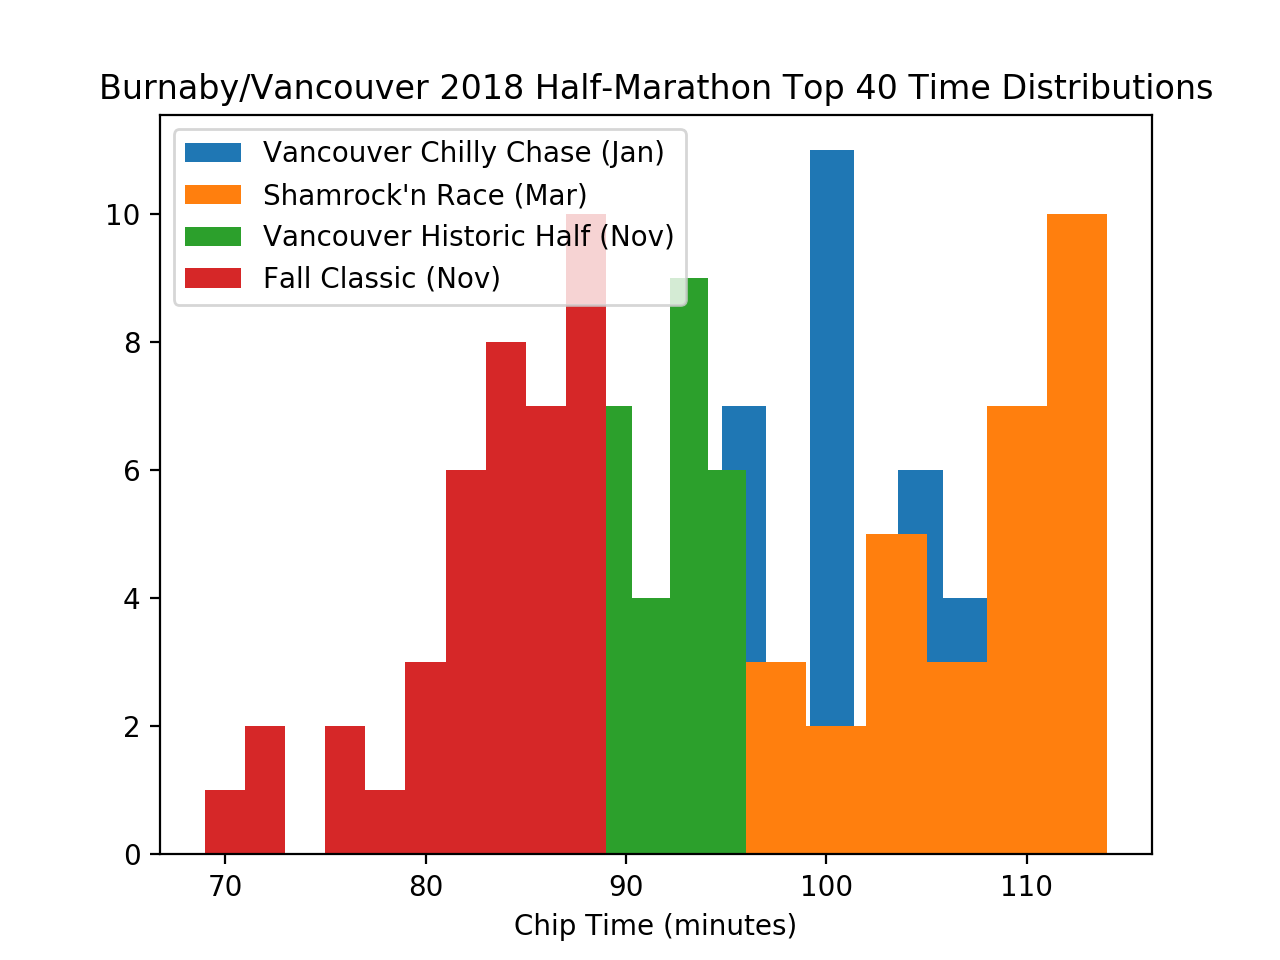

Text(0.5, 0, 'Chip Time (minutes)')

In [8]:
#This is what a distrubtion graph would like look with the default settings using Matplotlib
%matplotlib notebook
fig = plt.figure()
plt.title('Burnaby/Vancouver 2018 Half-Marathon Top 40 Time Distributions')

ax1 = plt.hist(chillychase['Time'].values, label = 'Vancouver Chilly Chase (Jan)')
ax2 = plt.hist(shamrock['Time'].values, label = 'Shamrock\'n Race (Mar)')
ax3 = plt.hist(vanhist['Time'].values, label = 'Vancouver Historic Half (Nov)')
ax4 = plt.hist(ubc['Time'].values, label = 'Fall Classic (Nov)')
plt.legend()

plt.xlabel('Chip Time (minutes)')

<IPython.core.display.Javascript object>


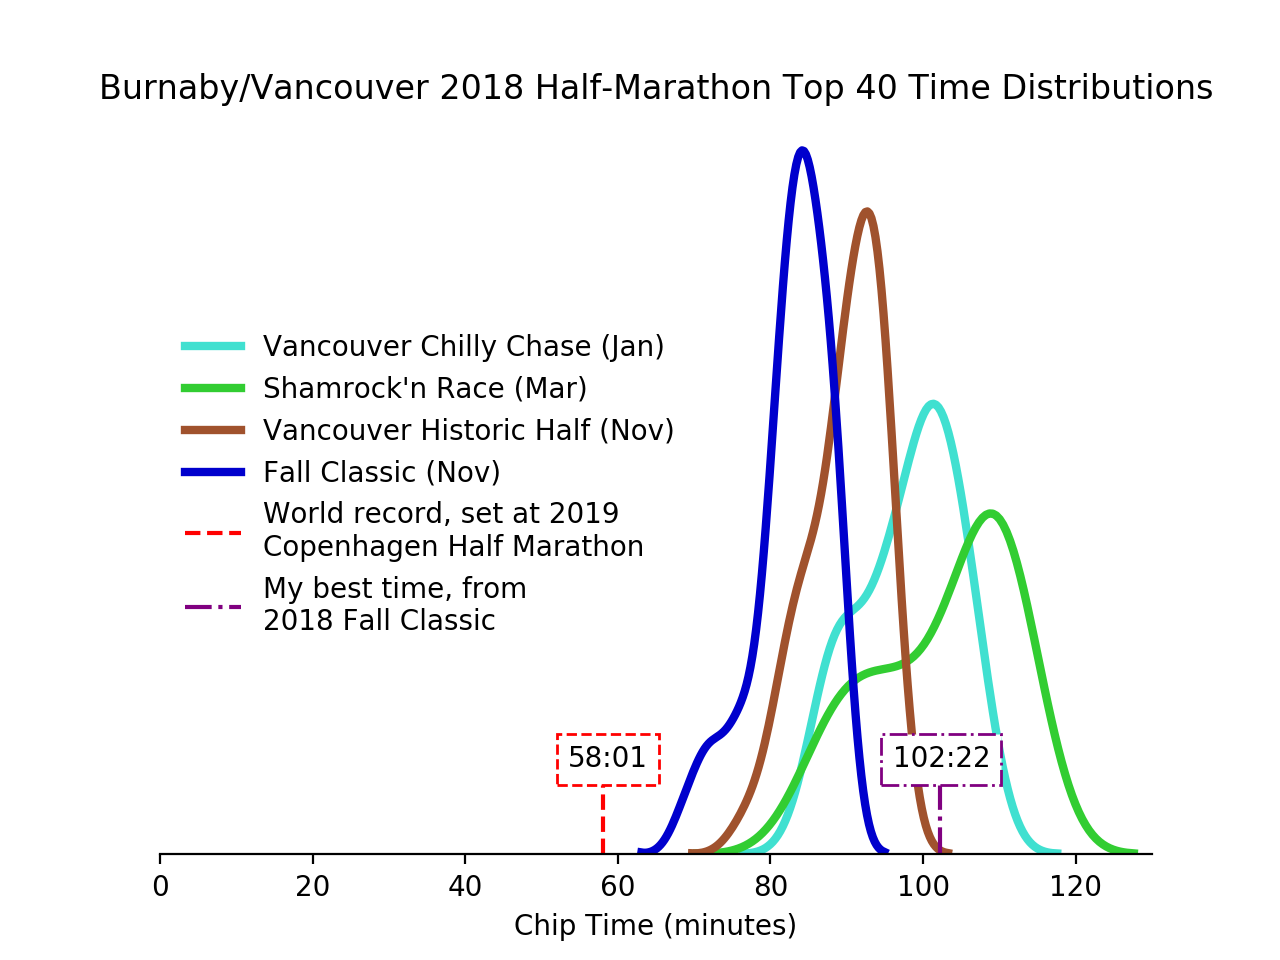

In [9]:
#This is what a distribution graph looks like, but encompasses truthfullness, functionality, beauty, and insightfulness as described by Alberto Cairo in The Truthful Art: Data, Charts, and Maps for Communication
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.title('Burnaby/Vancouver 2018 Half-Marathon Top 40 Time Distributions')

dist1 = sns.distplot(chillychase['Time'].values, hist=False, color='turquoise', kde_kws=dict(linewidth=3), label = 'Vancouver Chilly Chase (Jan)')
dist2 = sns.distplot(shamrock['Time'].values, hist=False, color='limegreen', kde_kws=dict(linewidth=3), label = 'Shamrock\'n Race (Mar)')
dist3 = sns.distplot(vanhist['Time'].values, hist=False, color='sienna', kde_kws=dict(linewidth=3), label = 'Vancouver Historic Half (Nov)')
dist4 = sns.distplot(ubc['Time'].values, hist=False, color='mediumblue', kde_kws=dict(linewidth=3), label = 'Fall Classic (Nov)')
line1 = plt.axvline(x=58.01, ymax=0.1, ls='--', color='red', label = 'World record, set at 2019 \nCopenhagen Half Marathon')
plt.text(53.5, 0.011,'58:01', bbox=dict(ls = '--', ec='red', color='white'))
line2 = plt.axvline(x=102.2, ymax=0.1, ls='-.', color='purple', label = 'My best time, from \n2018 Fall Classic')
plt.text(96, 0.011,'102:22', bbox=dict(ls = '-.', ec='purple', color='white'))
legend = plt.legend(loc = 'center left', frameon=False)

plt.xlim(0, 130)
plt.xlabel('Chip Time (minutes)')
plt.yticks([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)




## Discussion

This visualization was concerned with answering the question of how the distributions of half-marathon times for the top 40 participants compare across 4 different half-marathons (Vancouver Chilly Chase, Shamrock-n Race, Vancouver Historic Half, Fall Classic) in Burnaby and Vancouver in 2018. Not all half-marathons in Burnaby/Vancouver were included in this comparison (for example, the BMO Vancouver Half-Marathon, which typically invites international athletes, was excluded). The top 40 times for the Fall Classic were scraped from sportstats.ca. The top 40 times for the other races were retrieved from pdfs on tryevents.ca, the organization that hosted these other races, and convered to csv files. Only the chip time (as opposed to the gun time) was used to compare participants since all the races contained the chip time data. 

The plot indicates that the top-40 participants of the Fall Classic completed the half-marathon in a shorter time and within a narrower time distribution than the other races (1st place runner finished in 69 minutes, the 40th place runner finished in 89 minutes, and thus the top 40 runners in this race all finished between this 20 minute time span). The top-40 participants of the Shamrock'n Race took the longest time to finish and had the widest finishing time distribution out of the 4 races (1st place runner finished in 84 minutes, the 40th place runner finished in 114 minutes, and thus the top 40 runners in this race all finshed between this 30 minute time span). The other two races, the Vancouver Chilly Chase and the Vancouver Historic Half had distributions between that of the Fall Classic and the Shamrock'n Race. The bump on the left side of three of the distributions seems to indicate that there is usually a smaller group of fast runners (maybe professionals) in each race who finish extremely quickly and skew the distrubtion, and then the rest of the top 40 are more normally distributed. 

In order to test the hypothesis that the participants of the half-marathon in January will take longer to finish because they have been training less over the winter months, the months that each half-marathon takes place is also included in the legend. Interestingly, the participants of the March half-marathon (Shamrock-n Race) were slower than the participants of the January half-marathon (Vancouver Chilly Chase). In retrospect, this hypothesis cannot be proved or disproved with the datasets chosen because the runners in each race are different. Other factors besides month that could contribute to what races runners choose to participate in are: prestige of the race (for example, the Fall Classic draws a higher calibre of runners), location (for example, the Shamrock'n Race is in Burnaby, while the Vancouver Chilly Chase is in Vancouver), and timing (for example, if the runner is anticipating competing in a full marathon in the upcoming weeks, they might not participate in a half-marathon that is just for fun). 

The world record half-marathon time of 58:01 minutes, set by Kenyan runner Geoffrey Kamworor on 15 September 2019 at the Copenhagen Half Marathon, and my (the author's) personal best half-marathon time are also included in this graphic for general interest purposes. 

### Describe your design choices for your visual in regards to Cairo's principle of truthfulness (e.g., avoiding misleading representations).

I deliberately expanded the x-axis to begin at 0 in order to compare the distributions of the finishing times of the top-40 participants in each race with more context and not misrepresent how long it takes for even the fastest runners to finish a half-marathon. 

### Describe your design choices for your visual in regards to Cairo's principle of beauty (e.g., using fonts, colors, and layout that are appropriate and aesthetically pleasing).

I opted for using the seaborn KDE plot to display the data, used colours that represented the race (sort-of), and removed unncessary graph elements (borders, y-axis values that do not actually change anyone's interpretation of the data knowing that this is a distribution)

### Describe your design choices for your visual in regards to Cairo's principle of functionality (e.g., choosing a charting type that is appropriate for the stated research question).

I used a Kernel Density Estimation (KDE) to show the distribution as opposed to a regular histogram because a regular histogram looks messy when the data overlaps to the extent that this data does. 

### Describe your design choices for your visual in regards to Cairo's principle of insightfulness (i.e., producing a "eureka" or "aha" response in the viewer).

The data really shows a difference in distribution of top-40 runners across 4 comparable half-marathons. Including the world record time and my personal best time give more context to see how runners are performing. 